This visualization attempts to show whether there is any significant correlation between the number of wins for the Washington Football Team each year, and the inches of snowfall in the DC region in the same year. Data is reviewed for the twenty-year period from 2001 through 2020. The football data was taken from pro-football-reference.com, and the snowfall data was taken from weather.gov. 

Note that the snowfall inches are summed from July to July. So snowfall for 2020 on my chart is the total inches from July 2019 - July 2020. Similarly, the football season called 2020 runs from Fall 2019 - Feb 2020. So the snowfall generally occurred during the football season. However, note that it is possible that some of the snowfall occurred after the season was over, say in March. A more detailed analysis would need to be done to exclude late-season snowfall.

The visualization seems to indicate a very poor and possibly inverse relationship between wins and snowfall. We see that in 3 of the 4 years with winning records (9 or greater is a winning season), the snowfall was lower than average (about 14 inches for DC). Similarly, in 5 of the 6 years with very low snowfall (5 or fewer inches), the team won 7 or more games. We might conclude that the DC players do not enjoy playing in messy weather.

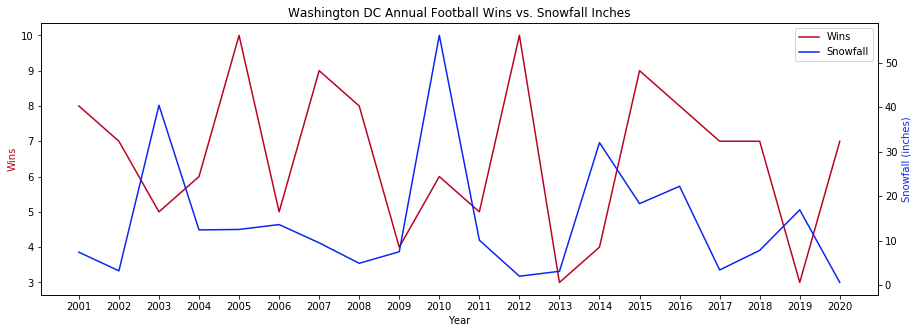

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df_f = pd.read_csv('DC_Football_Wins.csv',header=0) 
df_s = pd.read_csv('DC_Snowfall.csv',header=0)
# Merge dataframes
df = df_f.merge(df_s, left_index=True, right_index=True)
# Rename columns and sort by year ascending 
df = df.drop(['Year_y'], axis=1)
df = df.rename(columns={"Year_x": "Year"})
df = df.sort_index(ascending=False)
#print(df)

# Create Plot with two Y axes
fig, ax = plt.subplots(figsize = (15, 5))
ax2 = ax.twinx()
line1 = ax.plot(df['Year'], df['Wins'], color='#b8041f', label="Wins")
line2 = ax2.plot(df['Year'], df['Snowfall'], color='#0726f0', label="Snowfall")

# Add ornaments
plt.title('Washington DC Annual Football Wins vs. Snowfall Inches')
ax.set_xlabel('Year', color = 'black')
ax.set_ylabel('Wins', color='#b8041f')
ax2.set_ylabel('Snowfall (inches)', color='#0726f0')
plt.xticks(df['Year'])
lines = line1+line2
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, loc=0)

plt.show()
